In [29]:
import requests
import pandas as pd
from API import api_key

end_date = '2024-10-20'
start_date = '2024-09-20'


url = f'https://api.nasa.gov/DONKI/FLR?startDate={start_date}&endDate={end_date}&api_key={api_key}'

# Retrieves the data
response = requests.get(url)

# Stores the retreived data in a list
data = response.json()

In [30]:
from datetime import datetime

# Converting the list of data into a dataframe
df = pd.DataFrame(data)

# Removing the excess data
df = df.drop(columns=['instruments', 'sourceLocation', 'activeRegionNum',
                      'note', 'submissionTime', 'versionId', 'link', 'linkedEvents'], axis=1)

# Removing the numerical aspect of the class type so that it can be more categorical
# Can be X-class, M-class, or C-class
df['classType'] = df['classType'].apply(lambda x: x[:1])

# Converting the time strings into datetime objects
df['beginTime'] = df['beginTime'].apply(lambda x: datetime.fromisoformat(x))
df['peakTime'] = df['peakTime'].apply(lambda x: datetime.fromisoformat(x))
df['endTime'] = df['endTime'].apply(lambda x: datetime.fromisoformat(x))

# Determining the length of each solarflare
df['length'] = df['endTime'] - df['beginTime']

# When the peak occured over the course of the solar flare on a scale from 0 to 1
# I. e. if a peak occurs closer to the beginning of the flare it is closer to 0
df['peakPosition'] = (df['peakTime'] - df['beginTime']) / df['length']

# Cleaning the categorical data for analysis
df = pd.get_dummies(df, columns=['classType'], dtype='float')


df['classTypeNot_M'] = df['classType_C'] + df['classType_X']

df.drop(columns=['classType_C', 'classType_X'], inplace=True)

df.head(15)

,flrID,catalog,beginTime,peakTime,endTime,length,peakPosition,classType_M,classTypeNot_M
0,2024-09-22T21:12:00-FLR-001,M2M_CATALOG,2024-09-22 21:12:00+00:00,2024-09-22 21:39:00+00:00,2024-09-22 22:05:00+00:00,0 days 00:53:00,0.509434,1.0,0.0
1,2024-09-23T14:23:00-FLR-001,M2M_CATALOG,2024-09-23 14:23:00+00:00,2024-09-23 14:56:00+00:00,2024-09-23 15:34:00+00:00,0 days 01:11:00,0.464789,1.0,0.0
2,2024-09-25T22:57:00-FLR-001,M2M_CATALOG,2024-09-25 22:57:00+00:00,2024-09-25 23:12:00+00:00,2024-09-25 23:23:00+00:00,0 days 00:26:00,0.576923,1.0,0.0
3,2024-09-26T19:41:00-FLR-001,M2M_CATALOG,2024-09-26 19:41:00+00:00,2024-09-26 19:49:00+00:00,2024-09-26 19:54:00+00:00,0 days 00:13:00,0.615385,0.0,1.0
4,2024-09-26T22:58:00-FLR-001,M2M_CATALOG,2024-09-26 22:58:00+00:00,2024-09-26 23:12:00+00:00,2024-09-26 23:20:00+00:00,0 days 00:22:00,0.636364,1.0,0.0
5,2024-09-29T05:26:00-FLR-001,M2M_CATALOG,2024-09-29 05:26:00+00:00,2024-09-29 06:11:00+00:00,2024-09-29 06:48:00+00:00,0 days 01:22:00,0.548780,0.0,1.0
6,2024-09-29T12:49:00-FLR-001,M2M_CATALOG,2024-09-29 12:49:00+00:00,2024-09-29 12:53:00+00:00,2024-09-29 12:58:00+00:00,0 days 00:09:00,0.444444,1.0,0.0
7,2024-09-29T14:09:00-FLR-001,M2M_CATALOG,2024-09-29 14:09:00+00:00,2024-09-29 14:24:00+00:00,2024-09-29 14:31:00+00:00,0 days 00:22:00,0.681818,1.0,0.0
8,2024-09-29T14:31:00-FLR-001,M2M_CATALOG,2024-09-29 14:31:00+00:00,2024-09-29 14:41:00+00:00,2024-09-29 14:46:00+00:00,0 days 00:15:00,0.666667,1.0,0.0
9,2024-09-30T23:37:00-FLR-001,M2M_CATALOG,2024-09-30 23:37:00+00:00,2024-09-30 23:59:00+00:00,2024-10-01 00:23:00+00:00,0 days 00:46:00,0.478261,1.0,0.0


In [31]:
import matplotlib.pyplot as plt
import plotly.express as px

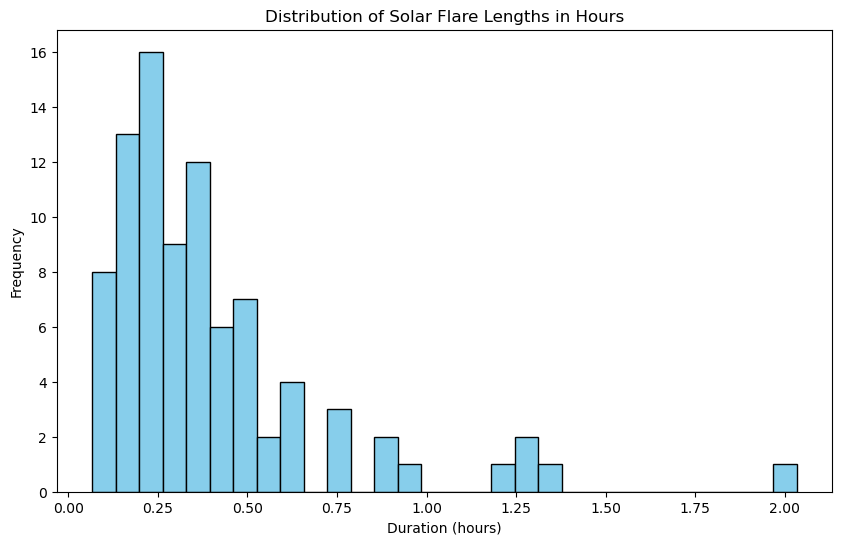

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(df['length'].dt.total_seconds() / 3600, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Solar Flare Lengths in Hours')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.show()

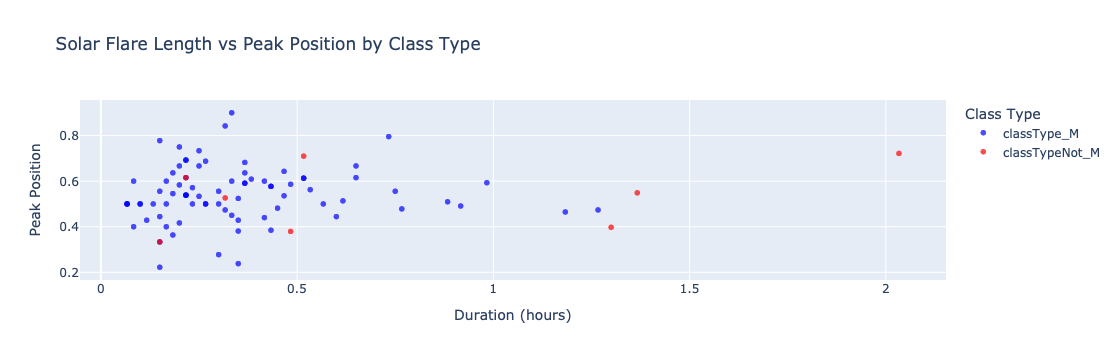

In [40]:
# melting the dataframe from wide rows to long columns
df_sorted = df.melt(id_vars=['flrID', 'peakPosition', 'length'], value_vars=['classType_M', 'classTypeNot_M'], var_name='ClassType', value_name='Presence')

# filter the dataframe to only include rows where the class type is present
df_sorted = df_sorted[df_sorted['Presence'] == 1]

# convert length to hours so it can be represented as a floating-point
df_sorted['length_hours'] = df_sorted['length'].dt.total_seconds() / 3600

# assign colors based on class type to be called later in figure
color_map = {'classType_M': 'blue', 'classTypeNot_M': 'red'}

# create the scatter plot
fig = px.scatter(
    df_sorted,
    x='length_hours',
    y='peakPosition',
    color='ClassType',
    hover_name='flrID',
    title='Solar Flare Length vs Peak Position by Class Type',
    labels={
        'length_hours': 'Duration (hours)',
        'peakPosition': 'Peak Position',
        'ClassType': 'Class Type'
    },
    color_discrete_map=color_map,
    opacity=0.7
)

fig.show()

In [41]:
import numpy as np
def add_bias_column(X):
    """
    Args:
        X (array): can be either 1-d or 2-d
    
    Returns:
        Xnew (array): the same array, but 2-d with a column of 1's in the first spot
    """
    
    # If the array is 1-d
    if len(X.shape) == 1:
        Xnew = np.column_stack([np.ones(X.shape[0]), X])
    
    # If the array is 2-d
    elif len(X.shape) == 2:
        bias_col = np.ones((X.shape[0], 1))
        Xnew = np.hstack([bias_col, X])
        
    else:
        raise ValueError("Input array must be either 1-d or 2-d")

    return Xnew

In [42]:
def line_of_best_fit(X, y):
    """
    Args:
        X (array): can be either 1-d or 2-d
        y (array): can be 1-d
    
    Returns:
        m : returns the line of best fit
    """
    
    X = add_bias_column(X)
    XtXinv = np.linalg.inv(np.matmul(X.T, X))
    m = np.matmul(XtXinv, np.matmul(X.T, y))
    
    return m

In [43]:
def linreg_predict(Xnew, ynew, m) :
    """
    Args:
        Xnew (array): can be a 1-d or 2-d array
        ynew (array): can be 1-d 
        m (array
    
    Returns:
        dict (dict) : returns the dictionary of the linreg predictions
    """
    
    Xnew = add_bias_column(Xnew)
    ypreds = np.dot(Xnew, m)
    res = ynew - ypreds
    
    dict = {
        'ypreds': ypreds,
        'resids': res,
        'mse': (res**2).mean(),
        'r2': r2_score(ynew, ypreds),
    }

    return dict

In [44]:
df['peakTime'] = pd.to_datetime(df['peakTime'], errors='coerce')  # Ensure datetime format
df['peakTime'] = (df['peakTime'] - df['peakTime'].min()).dt.total_seconds()  # Convert to seconds
df = df.dropna(subset=['peakTime'])

df['length'] = (df['length'] - df['length'].mean()) / df['length'].std()
df['classType_M'] = (df['classType_M'] - df['classType_M'].mean()) / df['classType_M'].std()

X = df[['length', 'classType_M']].to_numpy()
y = df['peakTime'].to_numpy()

In [45]:
from sklearn.model_selection import train_test_split

## This uses cross validation to get the line of best fit
crossval = train_test_split(X, 
                            y,
                            test_size=0.3,
                           )

Xtrain, Xtest, ytrain, ytest = crossval
w = line_of_best_fit(Xtrain, ytrain)
w

array([1207556.6800485 , -111191.39838696,   78139.91180823])

In [46]:
from sklearn.metrics import r2_score
res = linreg_predict(Xtest, ytest, w)
res['resids'] = res['resids'] / 1e6

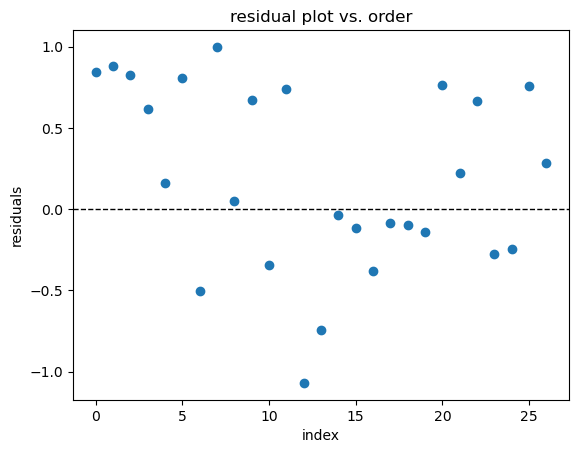

In [47]:
import matplotlib.pyplot as plt

## This gives us a scatter plot comparing the index and residual
plt.scatter(range(len(res['resids'])), res['resids'])
plt.xlabel("index")
plt.ylabel("residuals")
plt.axhline(0, color='black', linestyle='--', linewidth=1)  
plt.title("residual plot vs. order")
plt.show()

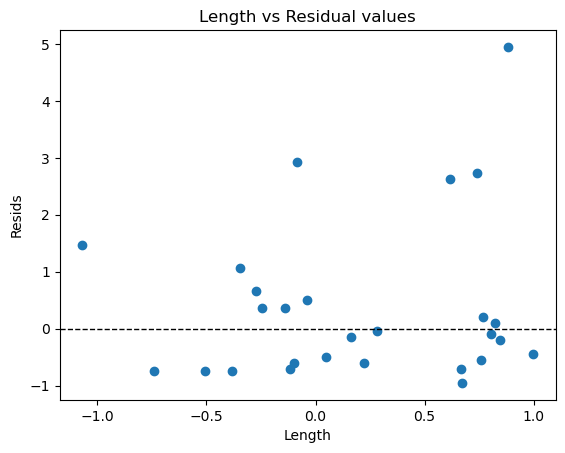

In [48]:
x = Xtest[:, 0]
plt.scatter(res['resids'], x)
plt.xlabel("Length")
plt.ylabel("Resids")
plt.axhline(0, color='black', linestyle='--', linewidth=1)  
plt.title("Length vs Residual values")
plt.show()

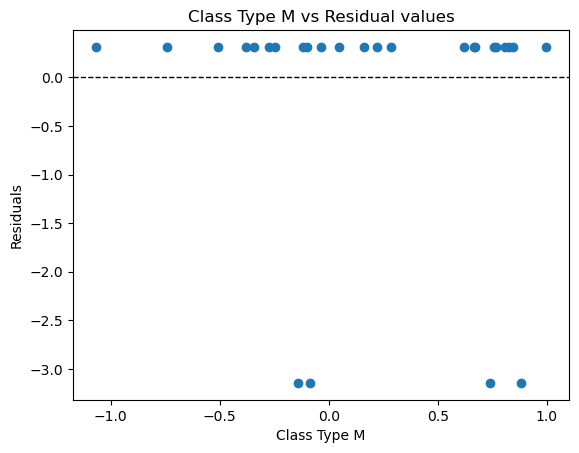

In [49]:
## Compares the Class Type M to the Residual values
x = Xtest[:, 1]  
plt.scatter(res['resids'], x) 
plt.axhline(0, color='black', linestyle='--', linewidth=1)  
plt.xlabel("Class Type M")  
plt.ylabel("Residuals")  
plt.title("Class Type M vs Residual values") 
plt.show()

(array([1., 1., 1., 4., 5., 2., 2., 0., 6., 5.]),
 array([-1.0689218 , -0.8622417 , -0.65556159, -0.44888148, -0.24220137,
        -0.03552126,  0.17115885,  0.37783895,  0.58451906,  0.79119917,
         0.99787928]),
 <BarContainer object of 10 artists>)

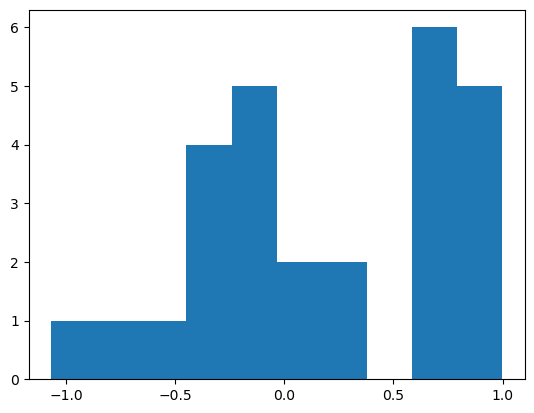

In [64]:
## Plots the histo
plt.hist(res['resids'])

## Discussion of preliminary results

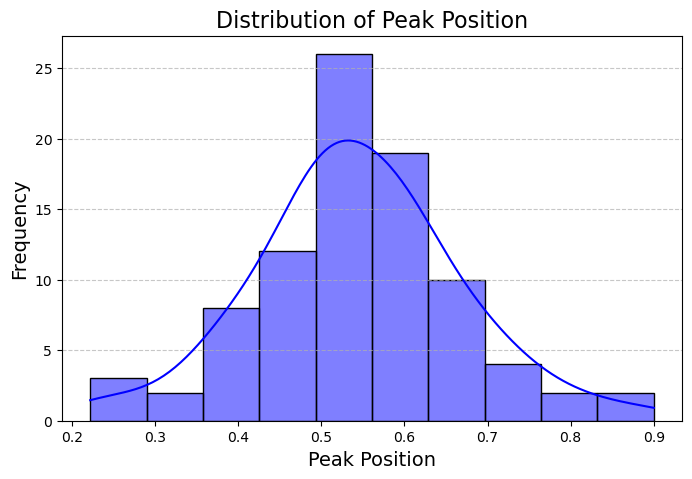

In [67]:
# Checking for assumptions

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['peakPosition'], kde=True, bins=10, color='blue')

plt.title('Distribution of Peak Position', fontsize=16)
plt.xlabel('Peak Position', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The distribution graph of peakPosition checks whether this feature has variability to be a good predictor in the model. It evaluates the shape of the distribution to ensure values are spread across a reasonable range and not heavily clustered or skewed, while also highlighting any potential outliers that might affect model performance and whether transformations might be needed to stabilize variance. This graph also checks key assumptions, such as whether peakPosition is well-distributed and meaningful for modeling, ensuring it has enough variability, lacks extreme outliers, and does not significant skewness. The distribution graph of peakPosition reveals that the values are fairly evenly distributed between approximately 0.44 and 0.68, with no extreme outliers. This suggests that flare peaks occur at various times within their durations without strong clustering towards the start or end, and the feature is likely suitable for modeling without requiring transformation.

- Proof of concept: We implemented two preliminary models to explore the relationships in our solar flare dataset. First, a linear regression model was developed to predict the length of a solar flare (length) based on its class type (classType_C, classType_M, classType_X) and the relative position of its peak (peakPosition). Our initial results showed a moderate correlation between flare class and duration, with higher-intensity flares (ex: X-class) generally lasting longer. However, peakPosition had weak predictive power, most likely due to its relatively uniform distribution across the dataset. We also tested a classification model, such as logistic regression or decision trees, to predict the flare’s class type (C, M, or X) using length and peakPosition. This model performed well in identifying M-class flares, which dominate the dataset, but faced challenges in distinguishing between C-class and M-class flares when their lengths overlapped. X-class flares, being more distinct, were identified with higher accuracy. To support these findings, visualizations of length and peakPosition distributions revealed a positive skew in flare lengths—indicating most flares are short with a few outliers—and a fairly even distribution of peak positions.

- Ethical Considerations: This project uses a dataset from NASA’s public API, which is transparent, reliable, and ethical. Since the data doesn’t contain sensitive information, any privacy concerns are significantly reduced. Public datasets like this are designed to support research and education, so it is an ideal and ethical choice for our analysis. However, there are still ethical challenges to keep in mind, especially when it comes to feature engineering and modeling. For example, if the model relies heavily on class type (C, M, or X) to make predictions, we need to ensure that this relationship reflects real scientific patterns. It should not just be a result of how the data was structured or processed, like having more examples of one class than another or biases introduced during cleaning. Ignoring these issues could lead to conclusions that misrepresent the actual results. It’s also important to think about how we present and share our findings, making sure we clearly explain any assumptions or limitations to avoid future misuse or misinterpretation of the analysis.